In [1146]:
#Import analysis tools and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#Read dataset into dataframe 

house_price = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv', na_values=' ')


In [1]:
import time

# get the start time
st = time.time()

# main program
# find sum to first 1 million numbers
sum_x = 0
for i in range(1000000):
    sum_x += i

# wait for 3 seconds
time.sleep(3)
print('Sum of first 1 million numbers is:', sum_x)

# get the end time
et = time.time()

# get the execution time
elapsed_time = et - st
print('Runtime:', elapsed_time, 'seconds')

Sum of first 1 million numbers is: 499999500000
Execution time: 3.0756349563598633 seconds


In [1147]:
#Show all the columns throghout analysis
pd.set_option('display.max_columns', None)


In [1148]:
#Print the first several rows 
print(house_price.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [1149]:
#Print shape of df

print(house_price.shape)

(1460, 81)


In [1150]:
#Show data types, number of records, and number of columns 

house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1151]:
#Count null values in each column

print(house_price.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [1152]:
#Show summary stats in each column 
print(house_price.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [1153]:
#Show a list of columns that have null values 
house_price[house_price.columns[house_price.isnull().any()]].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

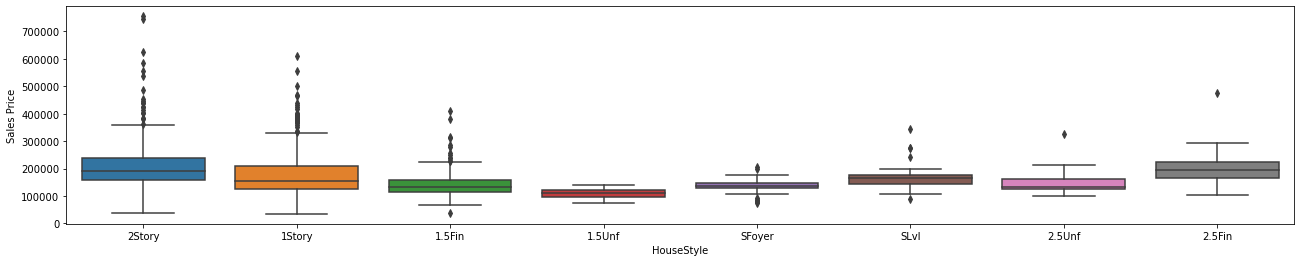

In [1154]:
#House style and sales price box plot 

sns.boxplot(x='HouseStyle', y='SalePrice', data= house_price)
plt.ylabel('Sales Price')
plt.show()

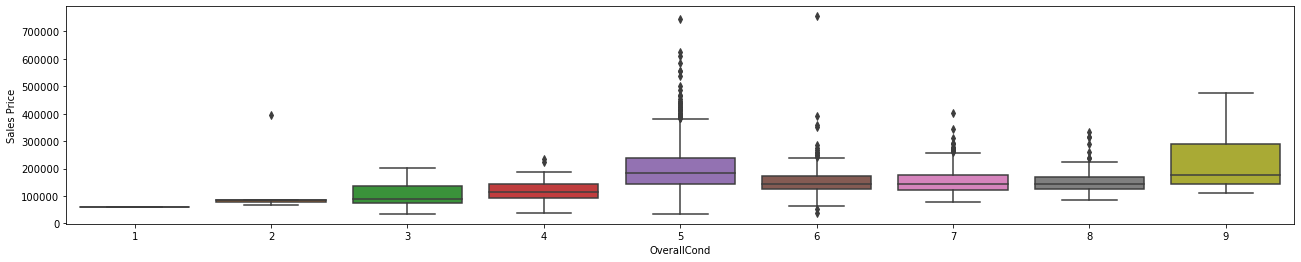

In [1155]:
#Sale price and overeall condition of the home box plot 
sns.boxplot(x='OverallCond', y='SalePrice', data=house_price)
plt.ylabel('Sales Price')
plt.show()

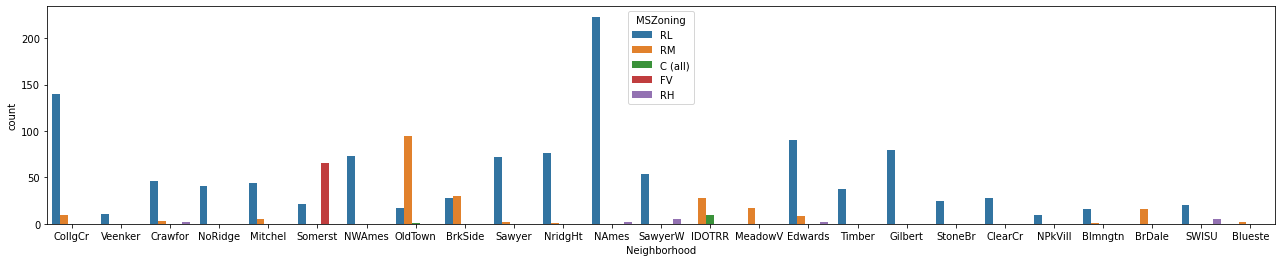

In [1156]:
#zoning area vs. neighborhoods column chart 

sns.countplot(x='Neighborhood', hue='MSZoning', data=house_price)
plt.show()

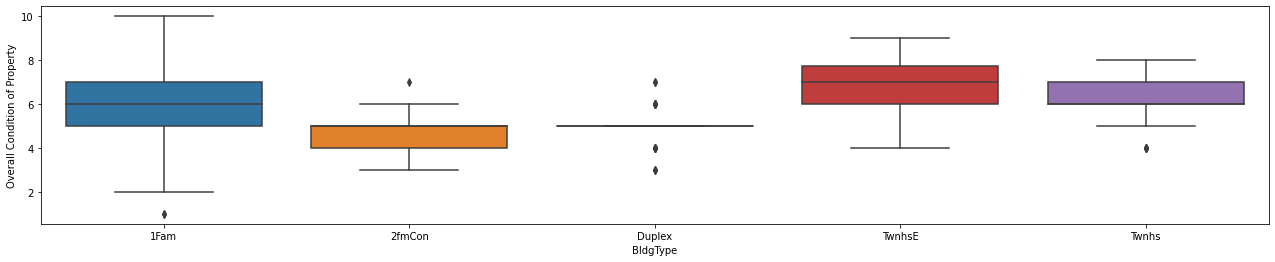

In [1157]:
#Building type and house quality box plot 
sns.boxplot(x='BldgType', y='OverallQual', data= house_price)
plt.ylabel('Overall Condition of Property')
plt.show()

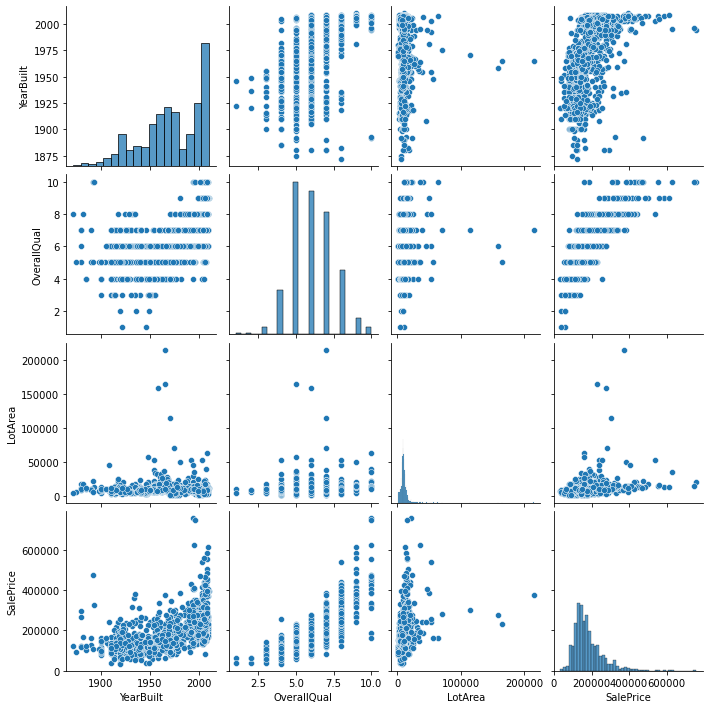

In [1158]:
#building vs years built vs condition vs lot area vs sale price subplots 

sns.pairplot(data = house_price[['YearBuilt', 'OverallQual','LotArea', 'SalePrice']])

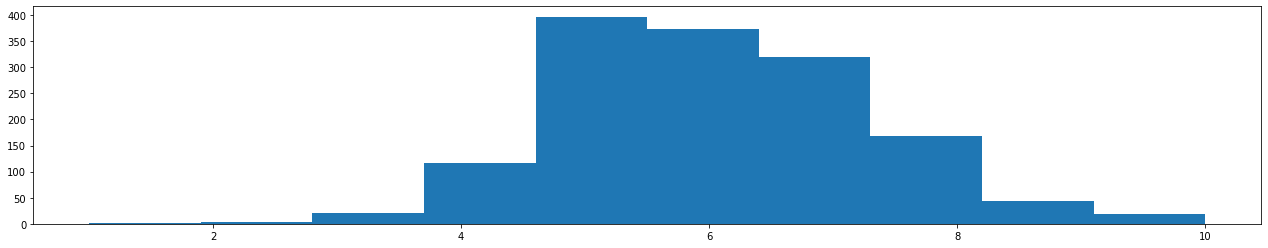

In [1159]:
#OverallQual histogram

plt.hist(house_price['OverallQual'])
plt.show()

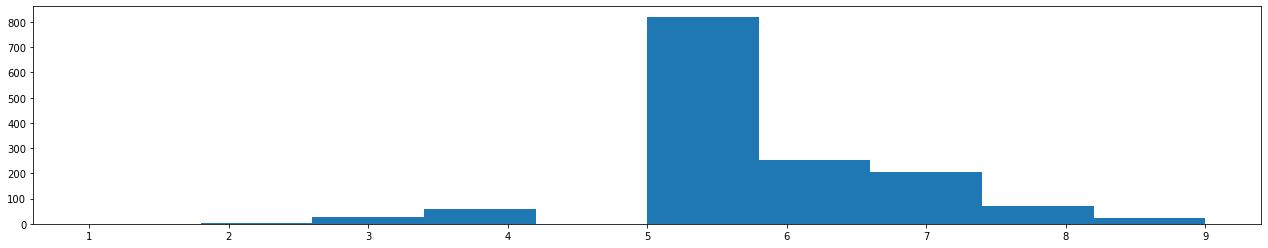

In [1160]:
#OverallCond histogram
        
plt.hist(house_price['OverallCond'])
plt.show()

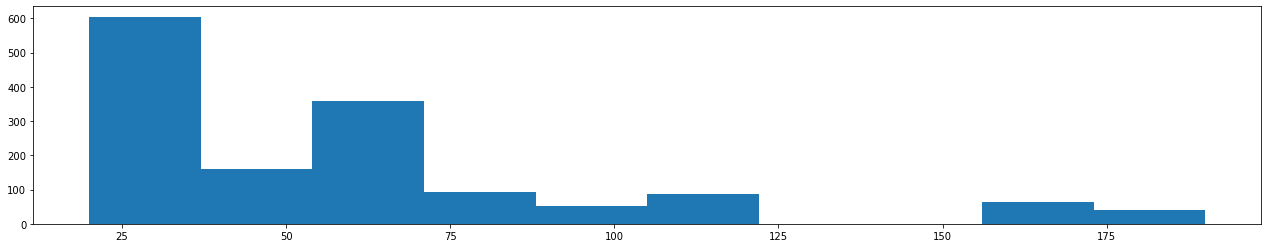

In [1161]:
#MSSubClass Histogram

plt.hist(house_price['MSSubClass'])
plt.show()

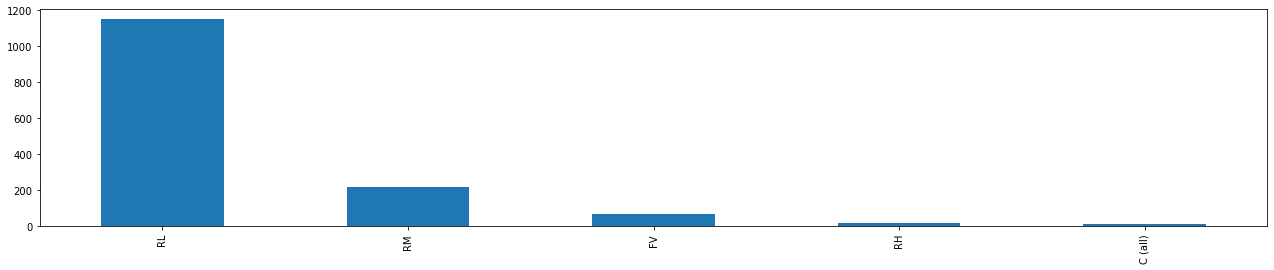

In [1162]:
#MSZonging bar chart
house_price['MSZoning'].value_counts().plot(kind='bar')
plt.show()

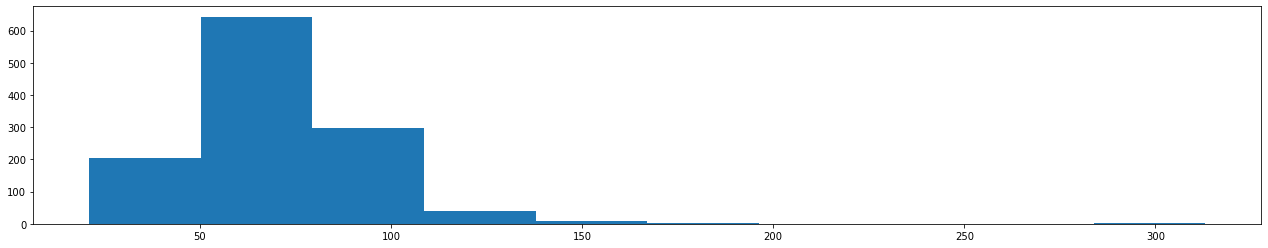

In [1163]:
#Lotfrontage histogram 
plt.hist(house_price['LotFrontage'])
plt.show()

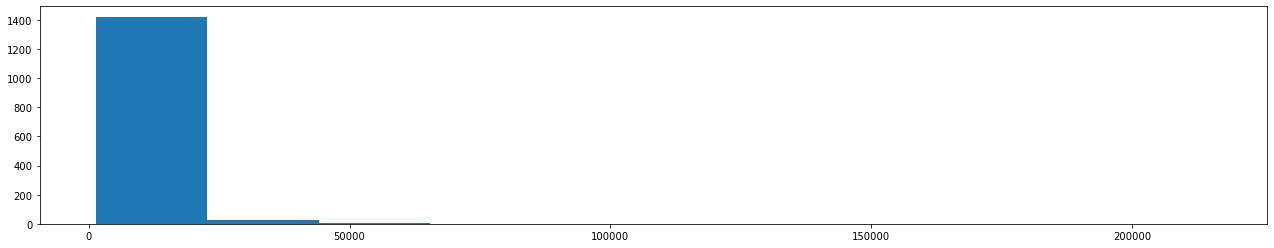

In [1164]:
#lotArea Histogram 
plt.hist(house_price['LotArea'])
plt.show()

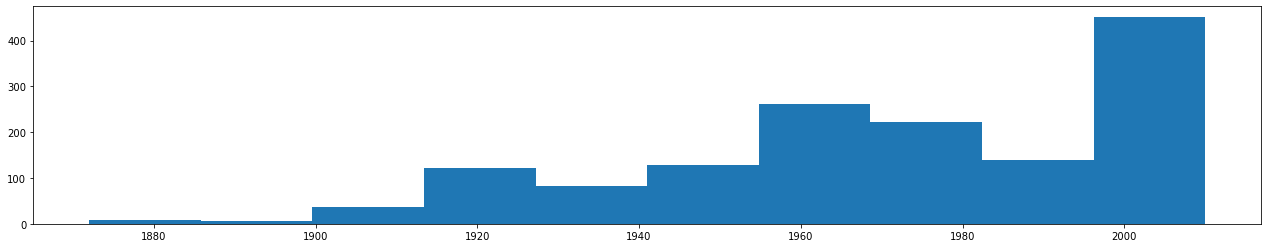

In [1165]:
#Yearbuilt histogram
plt.hist(house_price['YearBuilt'])
plt.show()


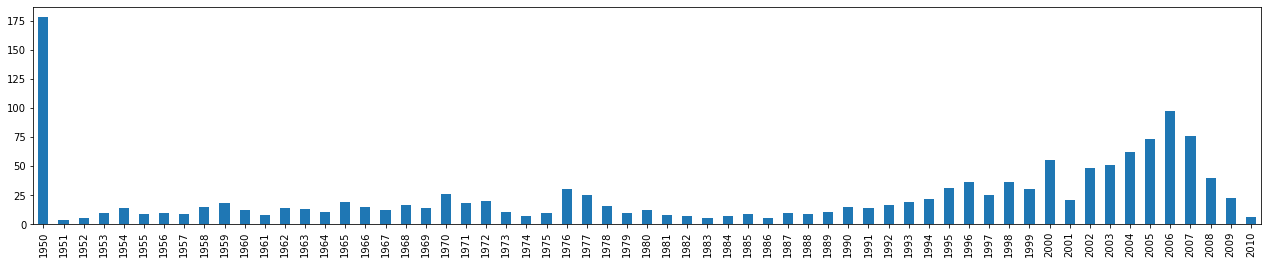

In [1166]:
#yearremodel is categorical variable. Thus bar chart was used 
house_price['YearRemodAdd'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()


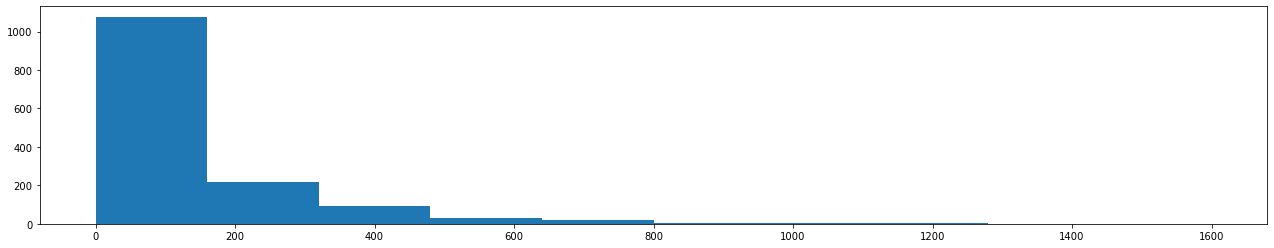

In [1167]:
#MaxVnrArea histogram 
plt.hist(house_price['MasVnrArea'])
plt.show()

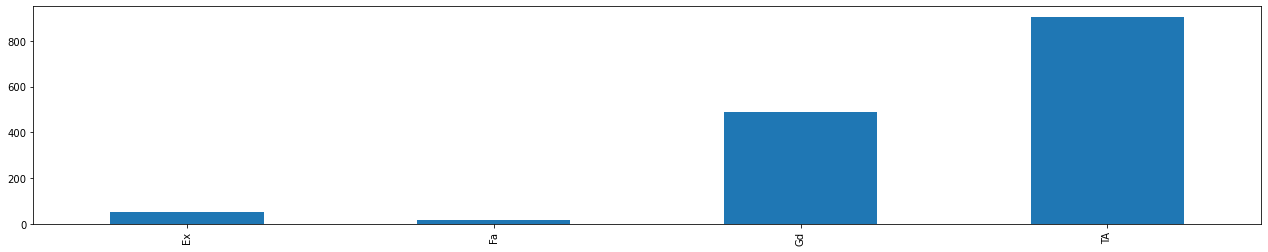

In [1168]:
#ExterQual bar chart

house_price['ExterQual'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

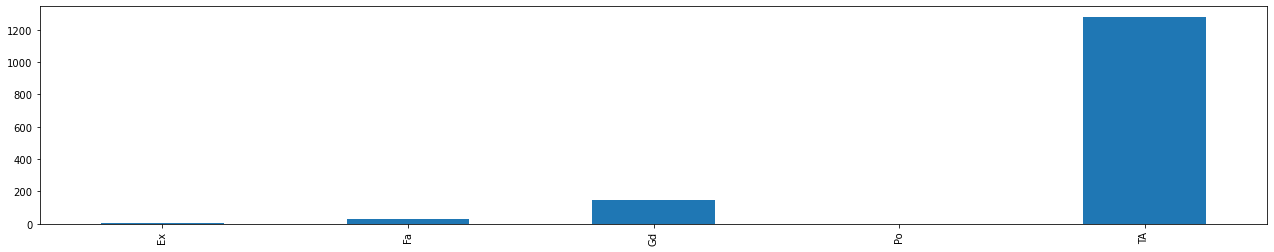

In [1169]:
#ExterQual bar chart

house_price['ExterCond'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()


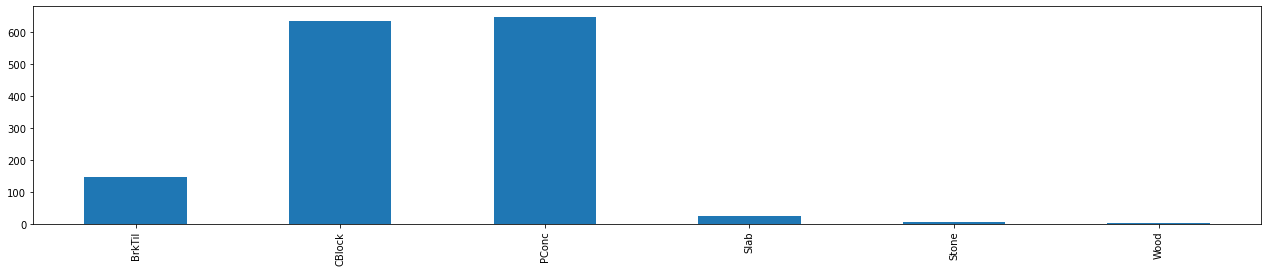

In [1170]:
#Foundation bar chart 
house_price['Foundation'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

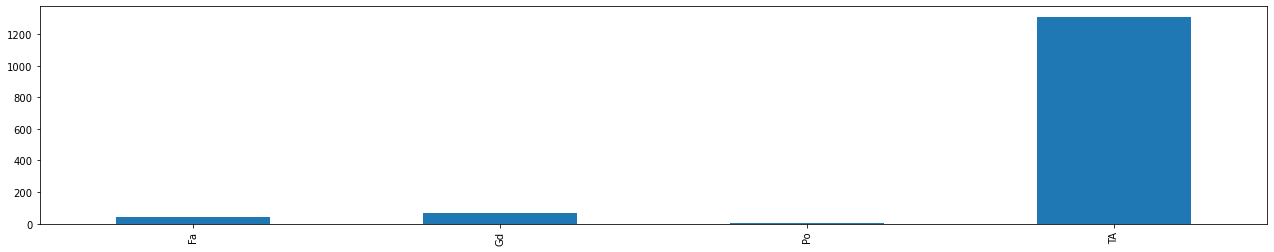

In [1171]:
#BsmtCond bar chart 
house_price['BsmtCond'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

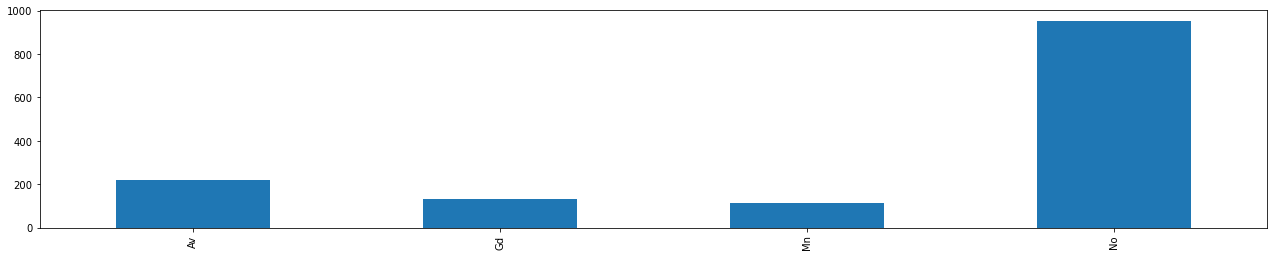

In [1172]:
#BsmtExposure bar chart 
house_price['BsmtExposure'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

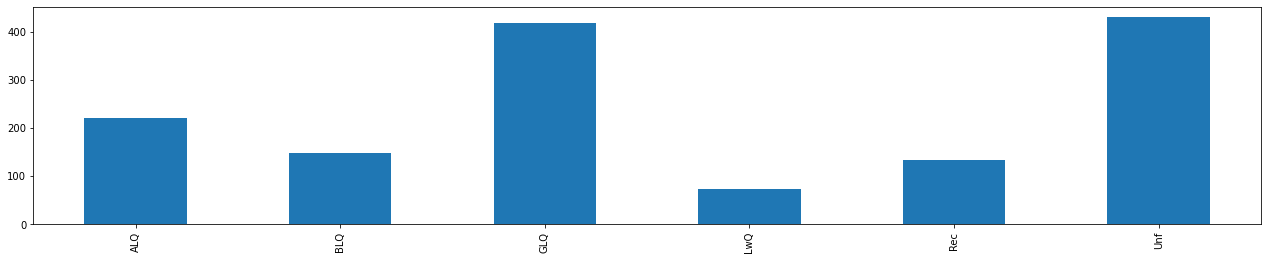

In [1173]:
#BsmtFinType1 bar chart 
house_price['BsmtFinType1'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

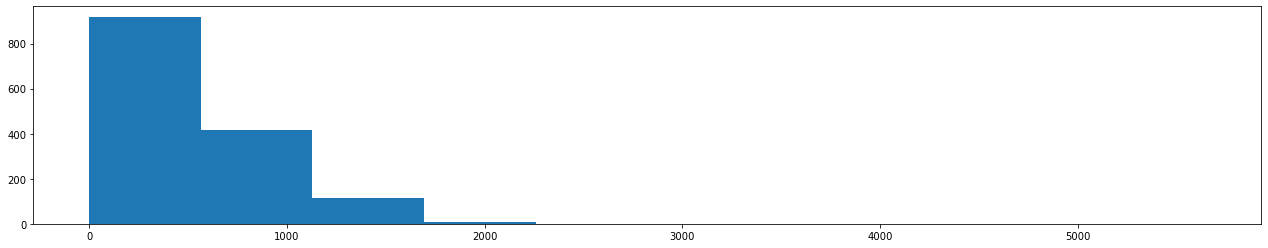

In [1174]:
#BsmtFinSF1 histogram 
plt.hist(house_price['BsmtFinSF1'])
plt.show()


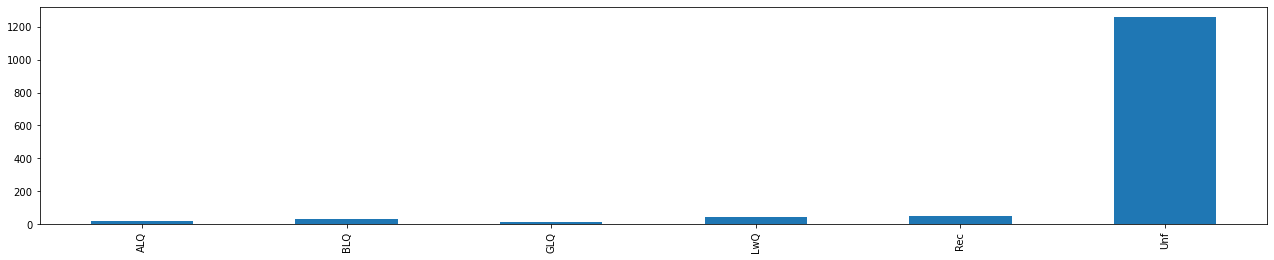

In [1175]:
#BsmtFinType2 bar chart 

house_price['BsmtFinType2'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

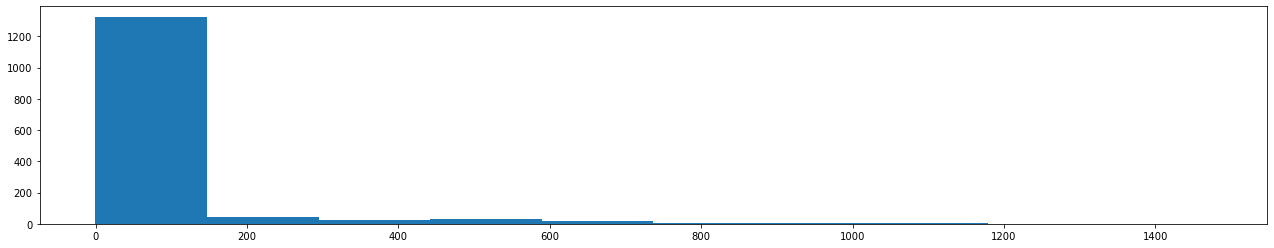

In [1176]:
#BsmtFinSF2 histogram 
plt.hist(house_price['BsmtFinSF2'])
plt.show()


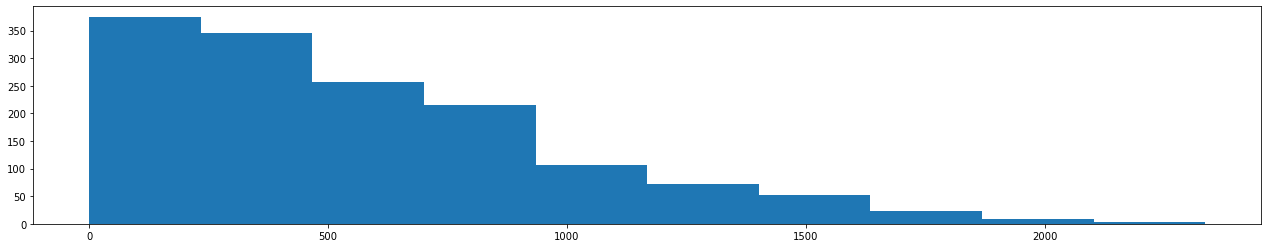

In [1177]:
#BsmtUnfSF histogram 
plt.hist(house_price['BsmtUnfSF'])
plt.show()


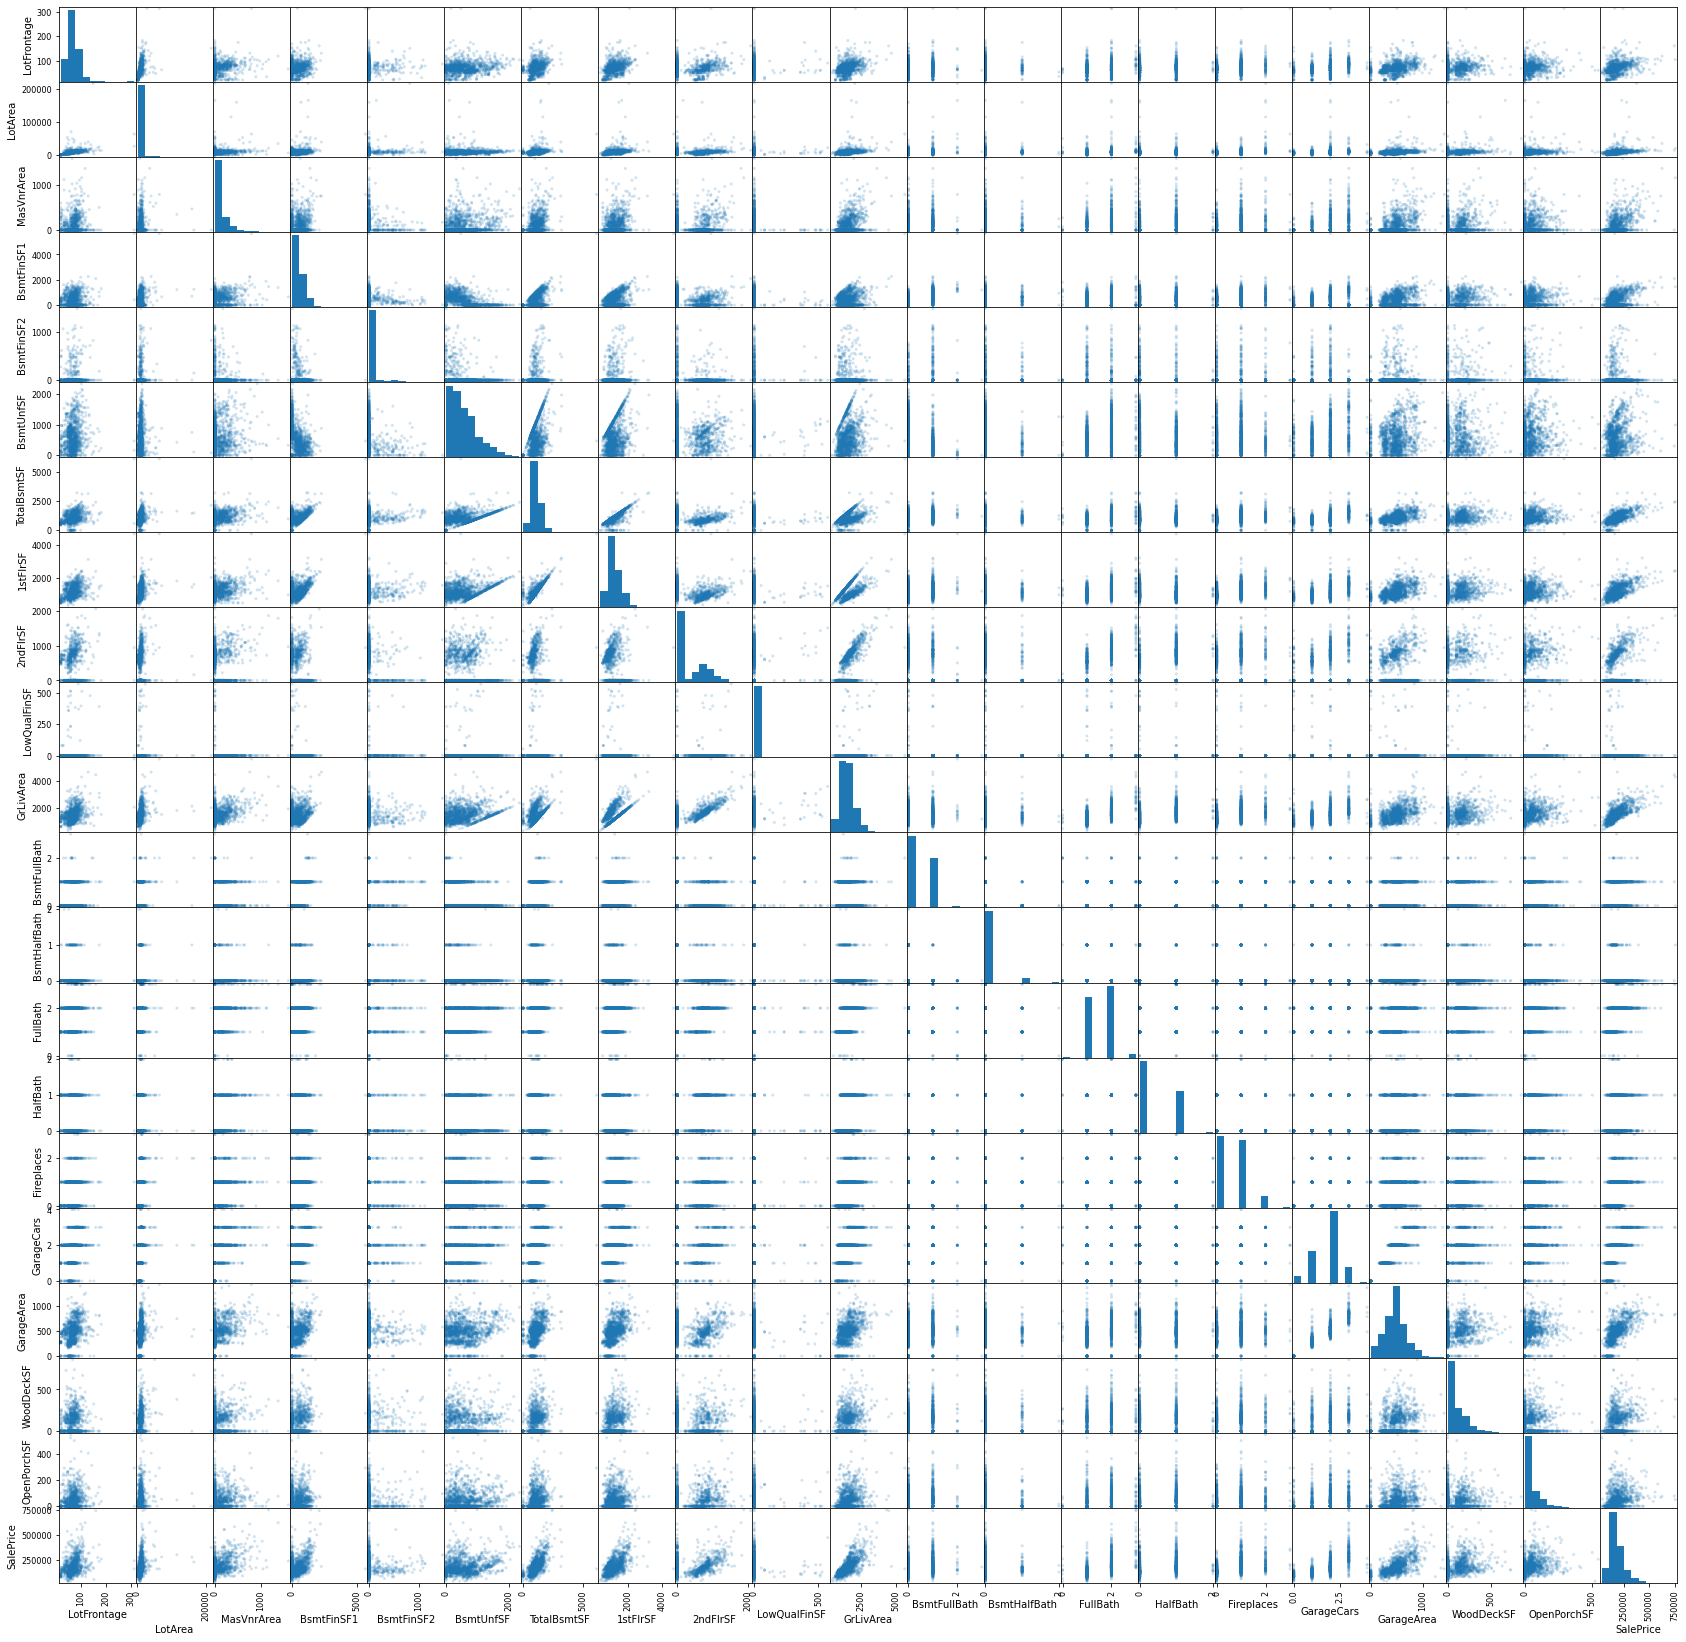

In [1178]:
# scatter plot matrix used to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(house_price[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
                            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                            'Fireplaces','GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']], alpha=0.2, figsize=(29, 29))
plt.show()


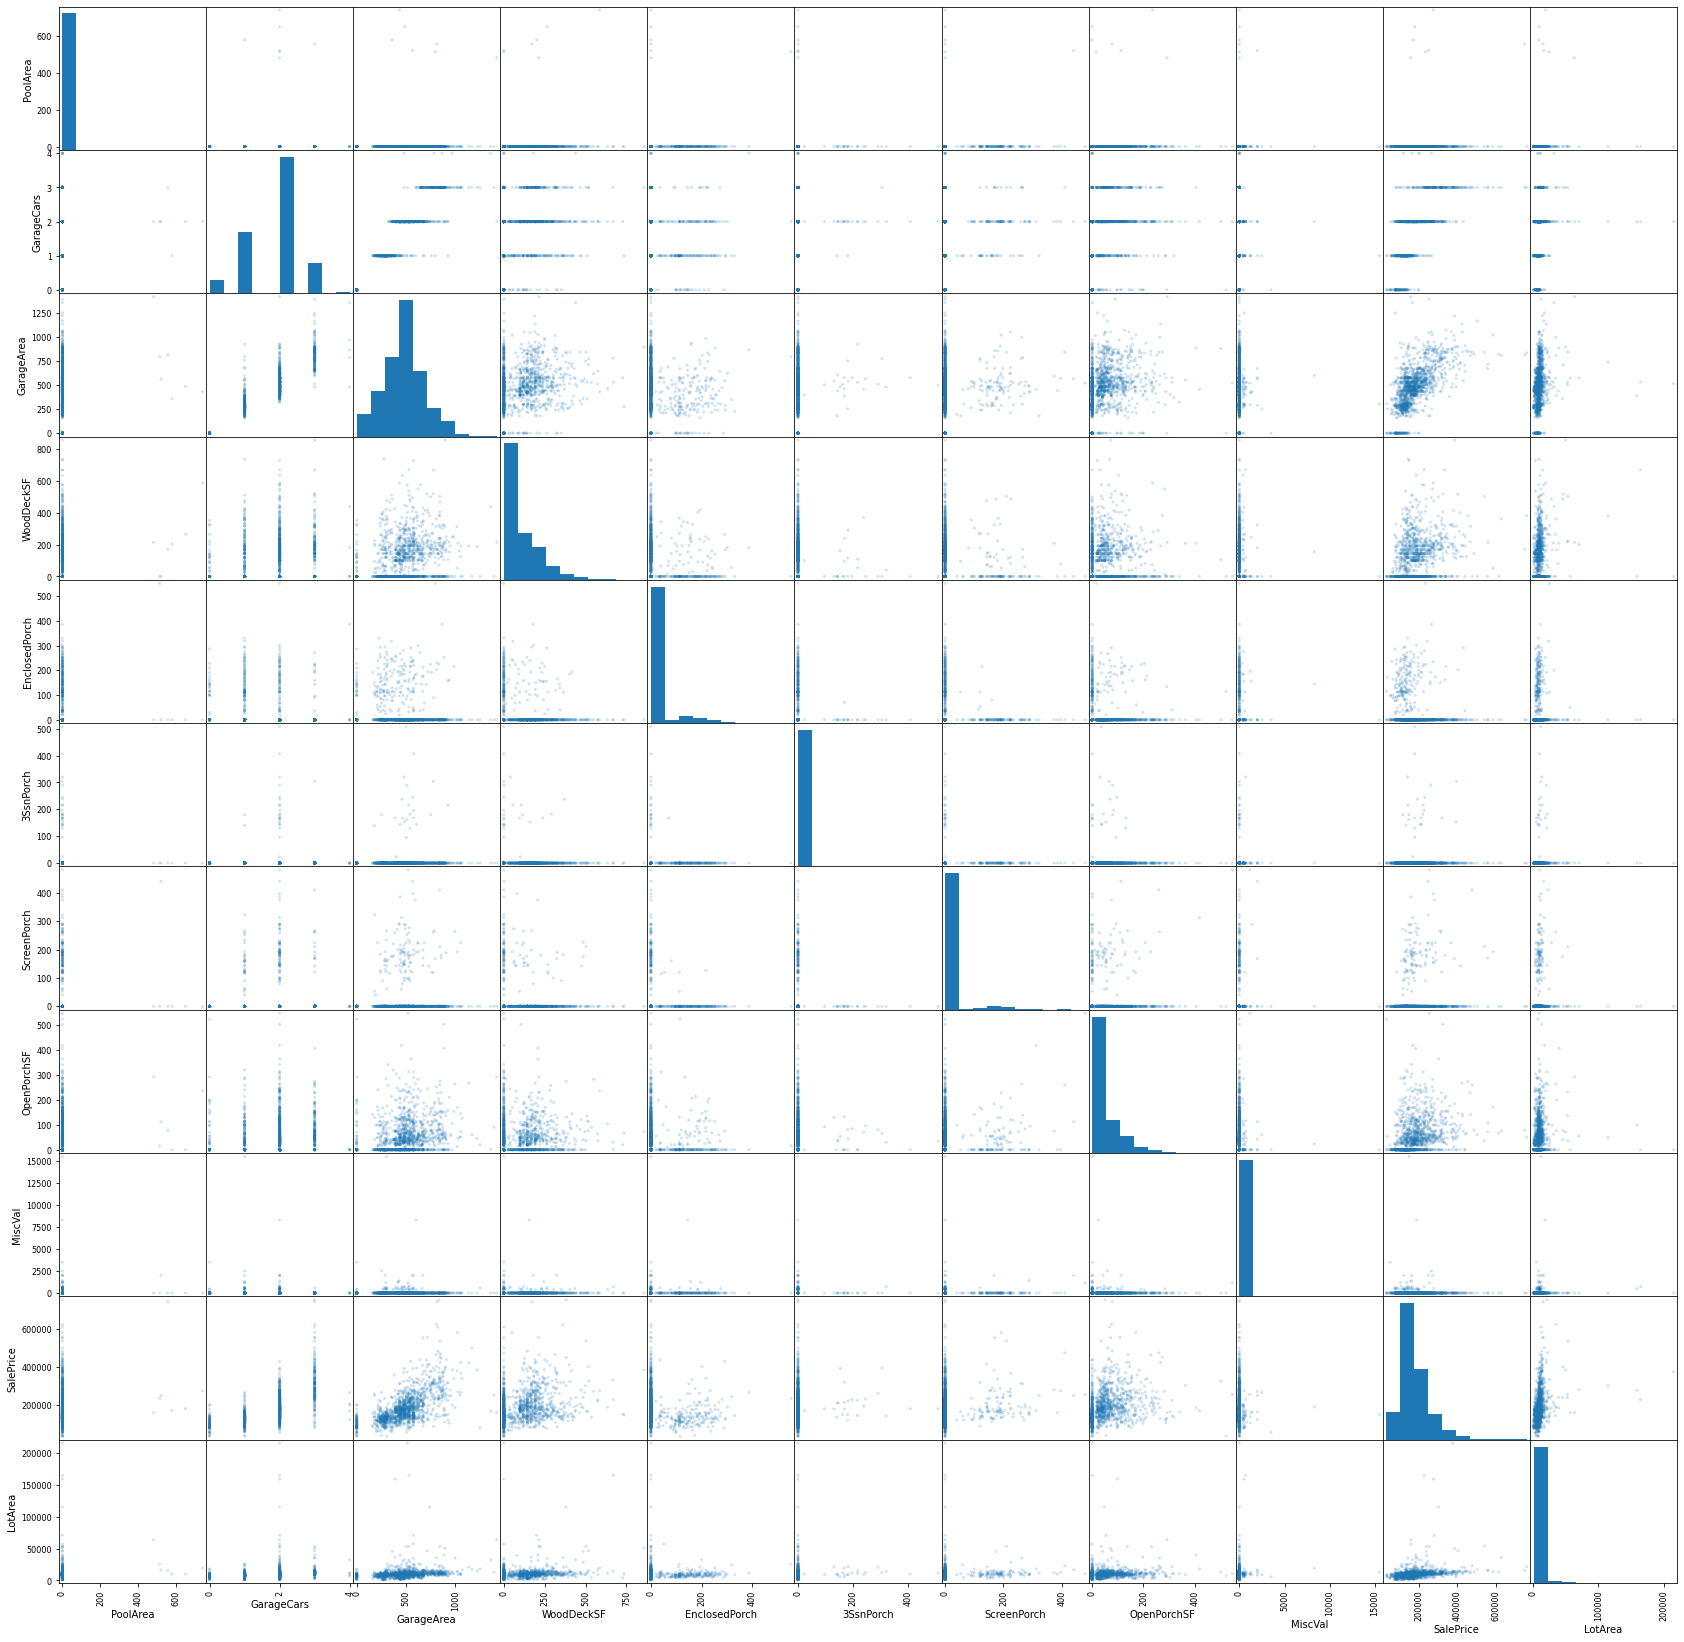

In [1179]:
# Another scatter plot to include the rest of the numerical variables - Lot area and sales price included due to them being independent variables
from pandas.plotting import scatter_matrix
scatter_matrix(house_price[['PoolArea', 'GarageCars','GarageArea','WoodDeckSF',  'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'OpenPorchSF'
                           , 'MiscVal', 'SalePrice', 'LotArea']], alpha=0.2, figsize=(29, 29))
plt.show()


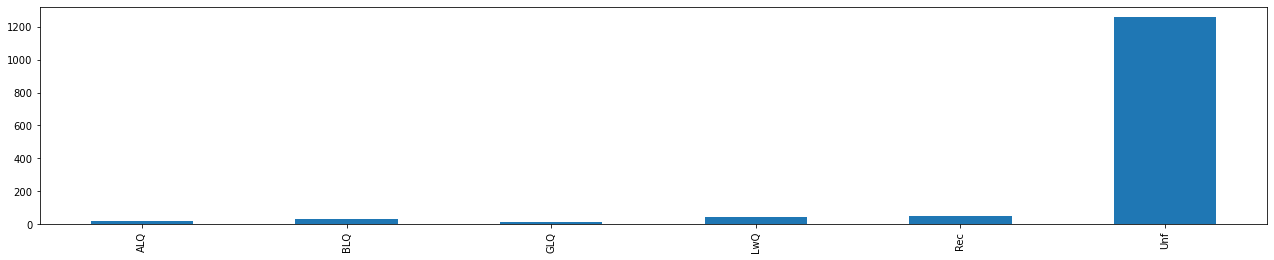

In [1180]:
#BsmtFinType1 bar chart 
house_price['BsmtFinType2'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

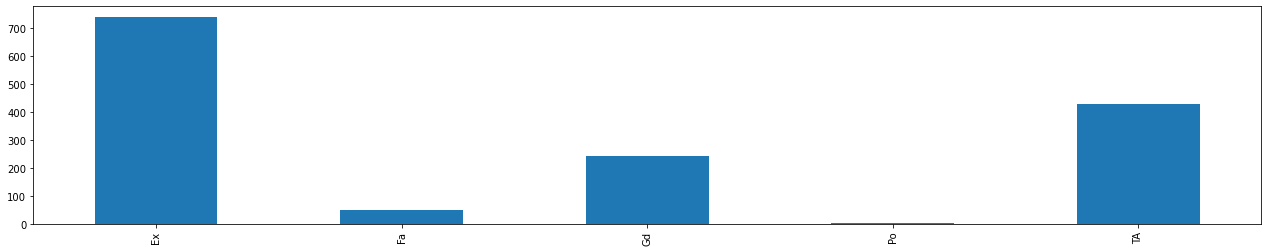

In [1181]:
#HeatingQC bar chart 
house_price['HeatingQC'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

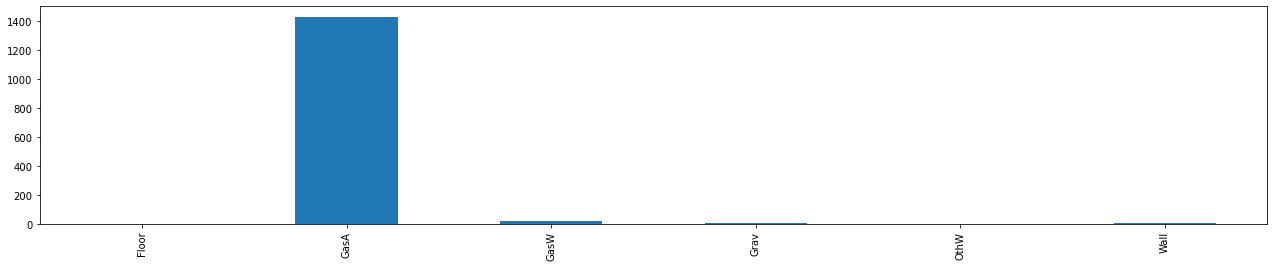

In [1182]:
#Heating bar chart 
house_price['Heating'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

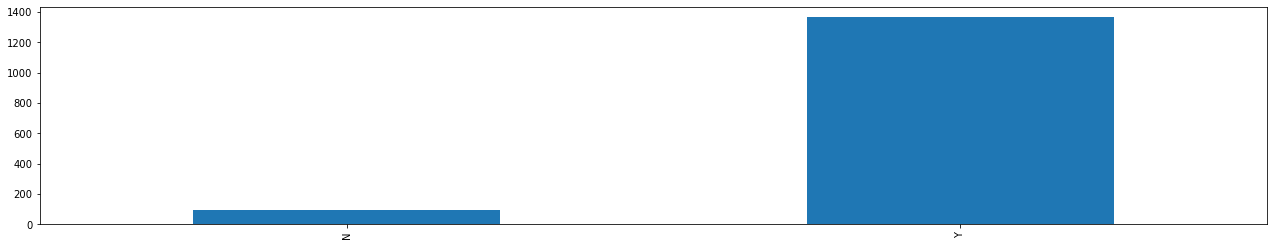

In [1183]:
#CentralAir bar chart 
house_price['CentralAir'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

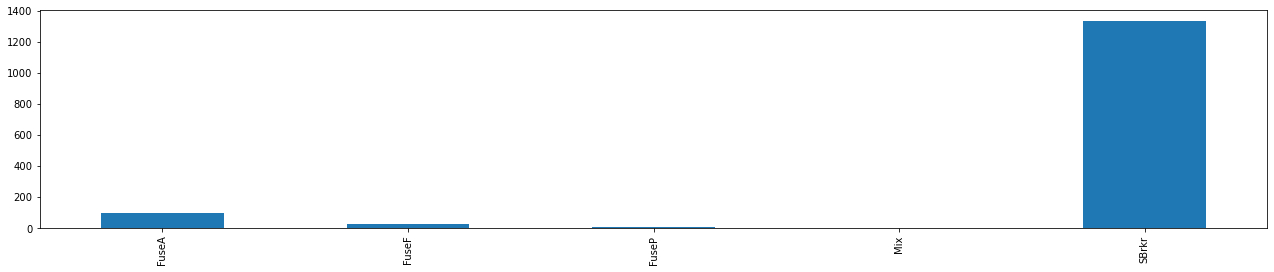

In [1184]:
#Electrical bar chart
house_price['Electrical'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

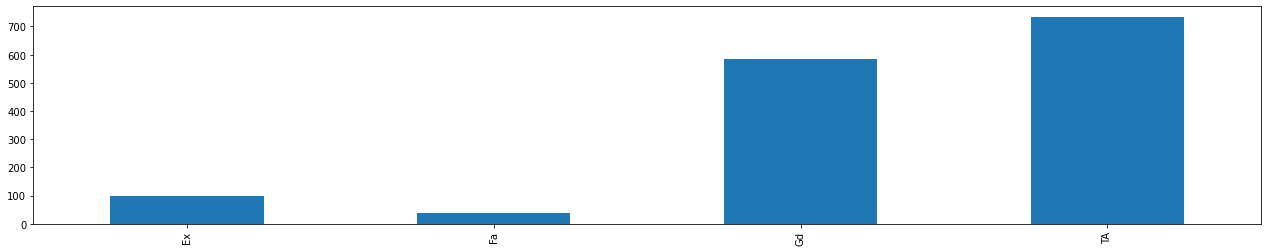

In [1185]:
#KitchenQual bar chart
house_price['KitchenQual'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

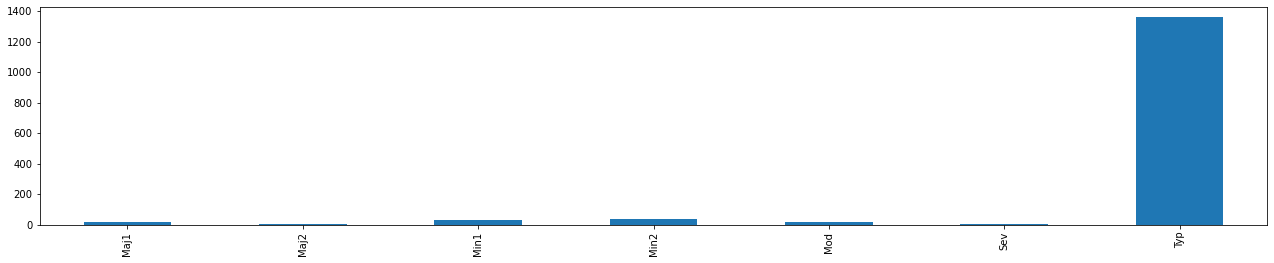

In [1186]:
#Functional bar chart
house_price['Functional'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

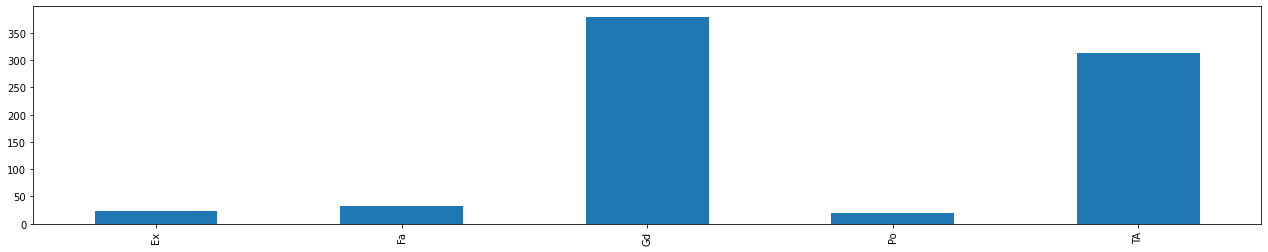

In [1187]:
#FireplaceQu bar chart 
house_price['FireplaceQu'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

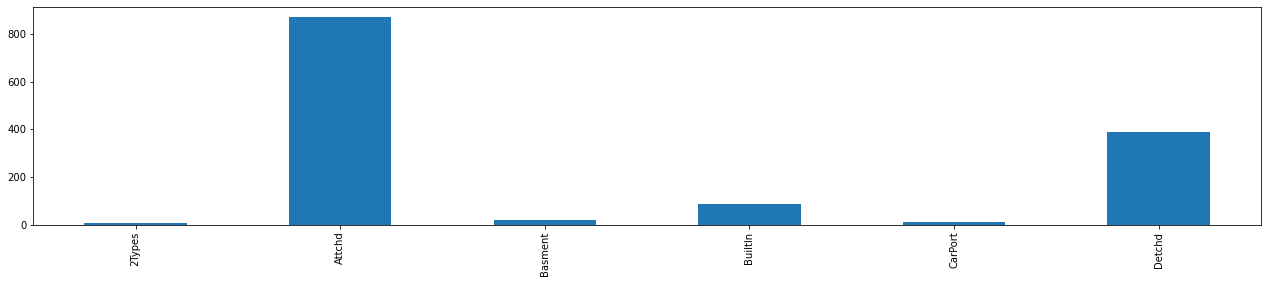

In [1188]:
#GarageType bar chart
house_price['GarageType'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

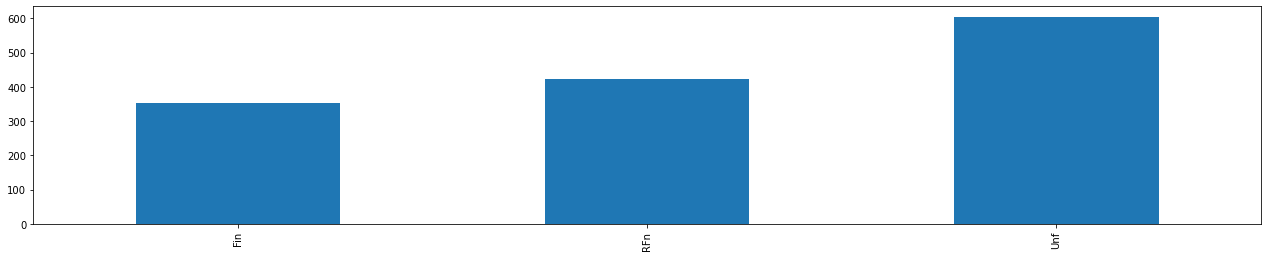

In [1189]:
#GarageFinish bar chart
house_price['GarageFinish'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

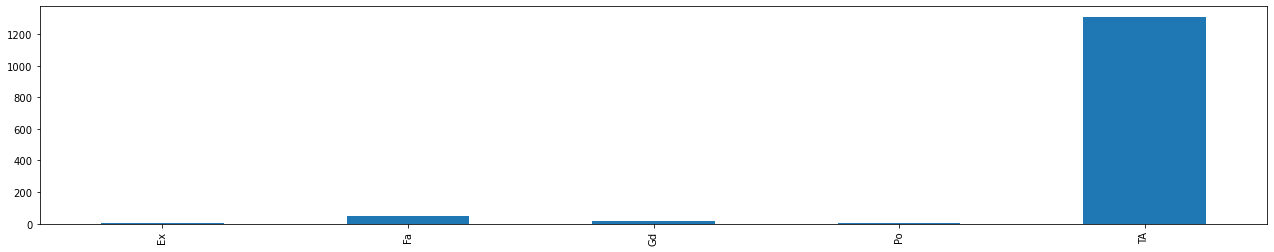

In [1190]:
#GarageQual bar chart
house_price['GarageQual'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

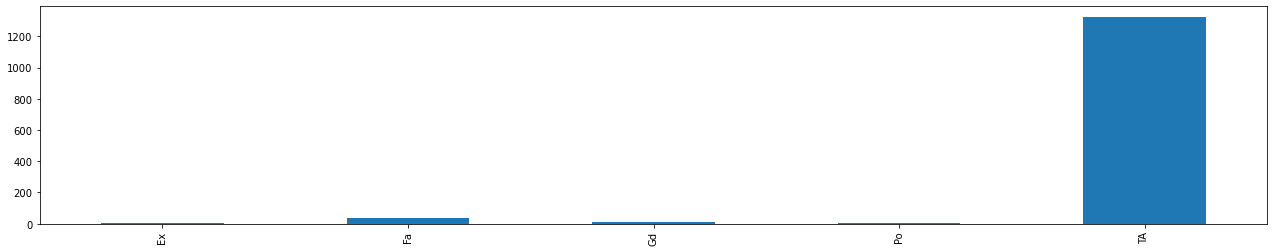

In [1191]:
#GarageCond bar chart
house_price['GarageCond'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

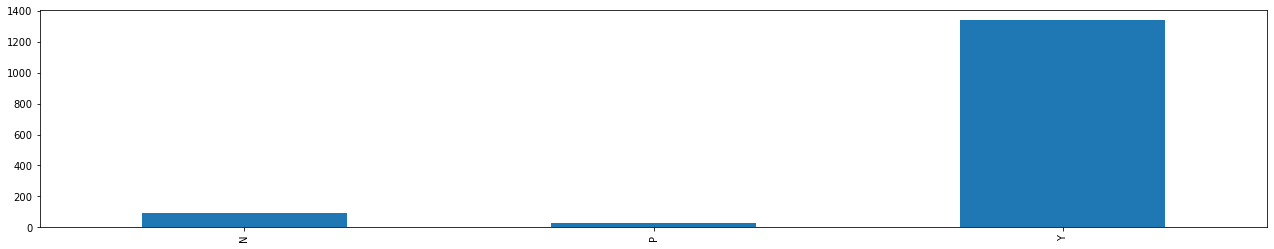

In [1192]:
#PavedDrive bar chart
house_price['PavedDrive'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

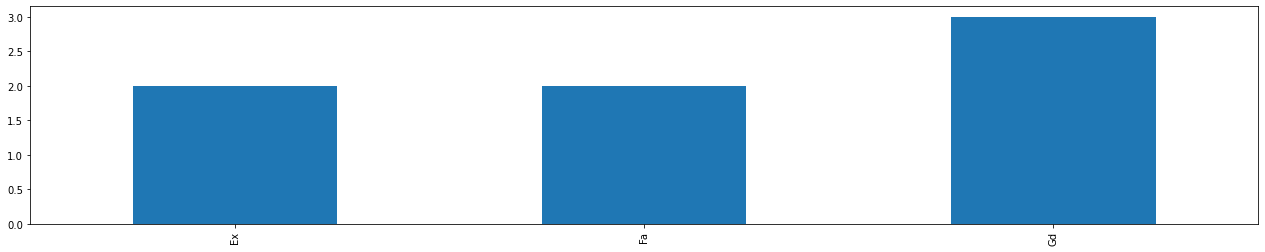

In [1193]:
#PoolQC bar chart
house_price['PoolQC'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

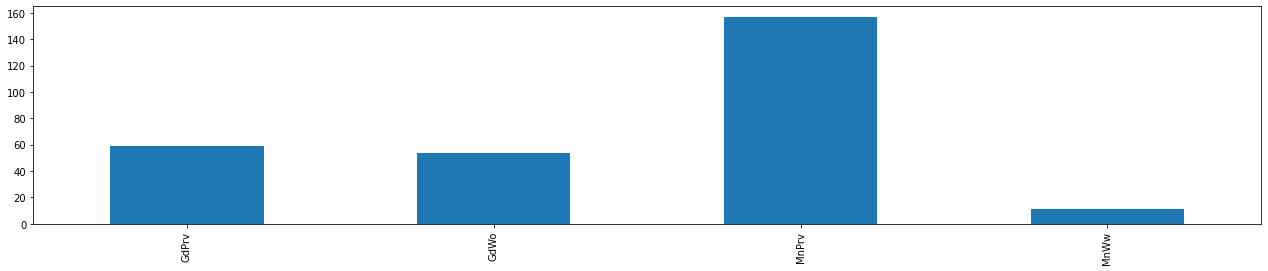

In [1194]:
#Fence bar chart
house_price['Fence'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

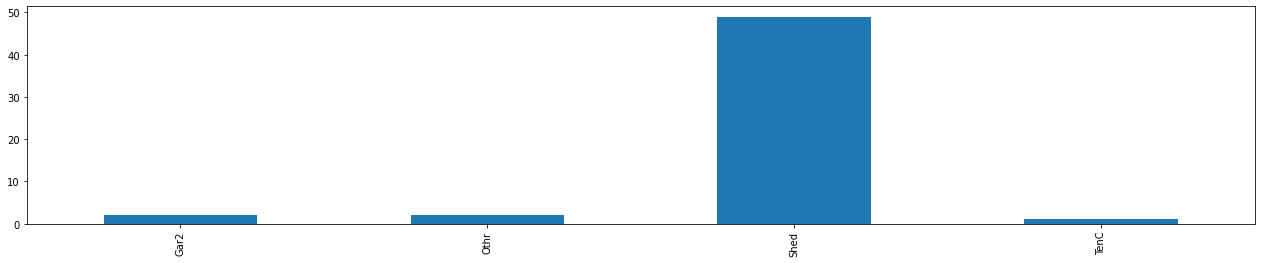

In [1195]:
#MiscFeature bar chart
house_price['MiscFeature'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

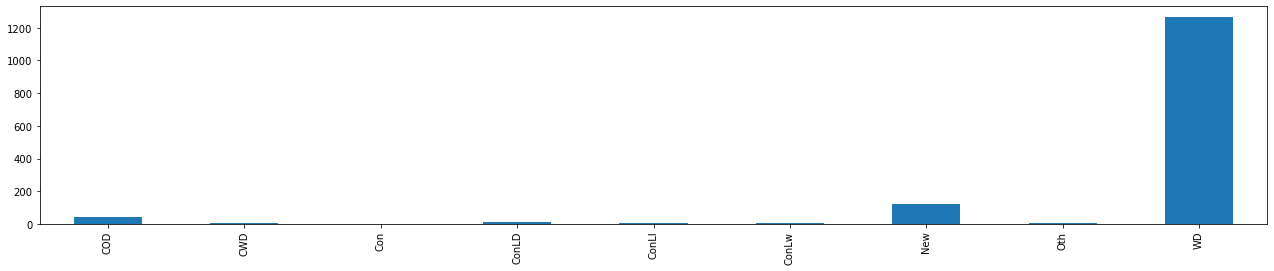

In [1196]:
#SaleType bar chart
house_price['SaleType'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

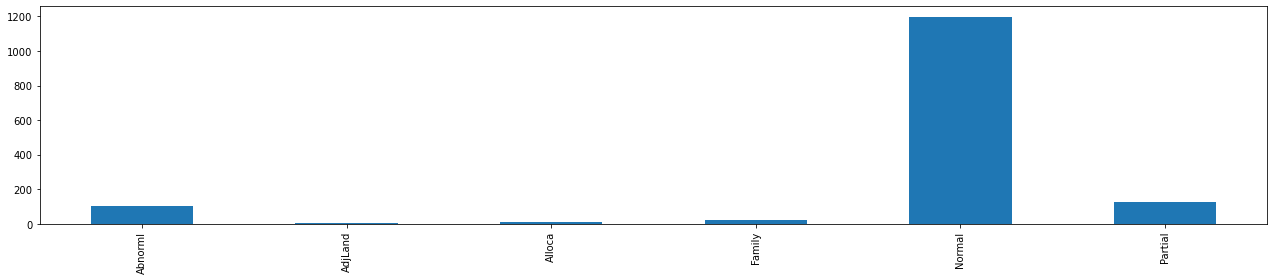

In [1197]:
#SaleCondition bar chart
house_price['SaleCondition'].value_counts().sort_index().plot(kind='bar')
plt.rcParams["figure.figsize"] = (22,4)    
plt.show()

In [1198]:
#Show columns and count of null values
house_price[house_price.columns[house_price.isnull().any()]].isnull().sum()


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [1199]:
#Drop columns where more than 60% of the variables are null

house_price.shape

more_than_60_missing_removed = house_price[house_price.columns[house_price.isnull().mean() < 0.60]]

In [1200]:
#Check to make sure cols were dropped 
more_than_60_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [1201]:
#Check to see which cols are MCAR (missing compeletely at random and are unfillable)

more_than_60_missing_removed.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1202]:
#Lotfrontage has only 17% of missing values. It would be too extreme to drop the column
#So I will fill it with the mean

more_than_60_missing_removed['LotFrontage'].fillna(more_than_60_missing_removed['LotFrontage'].mean(), inplace=True)

#Check to make sure all nulls within Lotfrontage have been filled 
more_than_60_missing_removed.LotFrontage.isnull().sum()

C:\Users\jadal\AppData\Local\Temp\ipykernel_28656\1086656906.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_60_missing_removed['LotFrontage'].fillna(more_than_60_missing_removed['LotFrontage'].mean(), inplace=True)


0

In [1203]:
#Replace missing values in MasVnrType with the mode

more_than_60_missing_removed['MasVnrType'].fillna(more_than_60_missing_removed['MasVnrType'].mode()[0], inplace=True)

more_than_60_missing_removed['MasVnrType'].isnull().sum()

C:\Users\jadal\AppData\Local\Temp\ipykernel_28656\611417854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_60_missing_removed['MasVnrType'].fillna(more_than_60_missing_removed['MasVnrType'].mode()[0], inplace=True)


0

In [1204]:
#Review columns with nulls 
more_than_60_missing_removed.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1205]:
#Fill MasVnrArea with mean 

more_than_60_missing_removed['MasVnrArea'].fillna(more_than_60_missing_removed['MasVnrArea'].mean(), inplace=True)

#Check to make sure all nulls within Lotfrontage have been filled 
more_than_60_missing_removed.MasVnrArea.isnull().sum()

C:\Users\jadal\AppData\Local\Temp\ipykernel_28656\855247993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_60_missing_removed['MasVnrArea'].fillna(more_than_60_missing_removed['MasVnrArea'].mean(), inplace=True)


0

In [1206]:
#drop rows with basement quality 

more_than_60_missing_removed = more_than_60_missing_removed.dropna(subset=['BsmtFinType1'])

#dfresult = df2.dropna(subset=['Population'])


In [1207]:
#check to make sure basement quality has no nulls 
more_than_60_missing_removed.BsmtQual.isnull().sum()

0

In [1208]:
#check to make sure basement condition has no nulls 
more_than_60_missing_removed.BsmtCond.isnull().sum()

0

In [1209]:
#Replace basement exposure with the mode
more_than_60_missing_removed['BsmtExposure'].fillna(more_than_60_missing_removed['BsmtExposure'].mode()[0], inplace=True)

more_than_60_missing_removed['BsmtExposure'].isnull().sum()

C:\Users\jadal\AppData\Local\Temp\ipykernel_28656\2905178638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_than_60_missing_removed['BsmtExposure'].fillna(more_than_60_missing_removed['BsmtExposure'].mode()[0], inplace=True)


0

In [1210]:
#drop rows with BsmtFinType2 missing
more_than_60_missing_removed = more_than_60_missing_removed.dropna(subset=['BsmtFinType2'])

more_than_60_missing_removed.BsmtFinType2.isnull().sum()

0

In [1211]:
#drop rows with BsmtFinType1 missing

more_than_60_missing_removed = more_than_60_missing_removed.dropna(subset=['BsmtFinType1'])

more_than_60_missing_removed.BsmtFinType1.isnull().sum()

0

In [1212]:
#Only one record is missing electrical. Row was dropped 

more_than_60_missing_removed = more_than_60_missing_removed.dropna(subset=['Electrical'])

more_than_60_missing_removed.Electrical.isnull().sum()

0

In [1213]:
#Review columns for nulls since changes were made

more_than_60_missing_removed.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [1214]:
#Review the shape of the dataframe 

more_than_60_missing_removed.shape

(1421, 77)

In [1215]:
#Check to see the % of values missing in each column
percent_missing = more_than_60_missing_removed.isnull().sum() * 100 / len(more_than_60_missing_removed)
missing_value_df = pd.DataFrame({'column_name': more_than_60_missing_removed.columns,
                                 'percent_missing': percent_missing})

percent_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage       0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.000000
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [1216]:
#remove fireplace quality because ~45% of values are missing. 

more_than_60_missing_removed = more_than_60_missing_removed.drop('FireplaceQu', axis=1)



In [1217]:
#Remove rows with garage type missing because they also have other values missing 

more_than_60_missing_removed = more_than_60_missing_removed.dropna(subset=['GarageType','GarageYrBlt','GarageFinish'])

more_than_60_missing_removed.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [1218]:
#review the shape of the df again 
more_than_60_missing_removed.shape

(1347, 76)

<Figure size 1152x360 with 0 Axes>

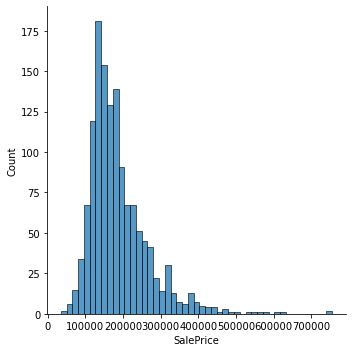

In [1219]:
#Review distribution for sale price now that the data has been cleaned 
plt.figure(figsize=(16,5))
sns.displot(more_than_60_missing_removed['SalePrice'])


In [1220]:
#Describe SalePrice 
more_than_60_missing_removed.SalePrice.describe()

count      1347.000000
mean     187061.350408
std       79033.554492
min       35311.000000
25%      135000.000000
50%      169500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [1221]:
#Setup SalePrice IQRs for outlier removal 
print(more_than_60_missing_removed.SalePrice.quantile(0.25))
print(more_than_60_missing_removed.SalePrice.quantile(0.75))

Q1 = more_than_60_missing_removed.SalePrice.quantile(0.25)
Q3 = more_than_60_missing_removed.SalePrice.quantile(0.75)
IQR = Q3- Q1

lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

print(lower_lim)
print(upper_lim)

print(IQR)

135000.0
220000.0
7500.0
347500.0
85000.0


In [1222]:
#Store the lowerlimit of saleprice in a new df 
low_outliers_saleprice = (more_than_60_missing_removed['SalePrice'] < lower_lim)

In [1223]:
#Store the upper limit of SalePrice in a new df 
up_outliers_saleprice = (more_than_60_missing_removed['SalePrice'] > upper_lim)


In [1224]:
#check the length 
len(more_than_60_missing_removed['SalePrice']) - (len(more_than_60_missing_removed['SalePrice'][low_outliers_saleprice]) + 
                                                      len(more_than_60_missing_removed['SalePrice'][up_outliers_saleprice]))

1290

In [1225]:
#remove outliers
more_than_60_missing_removed = more_than_60_missing_removed[~(low_outliers_saleprice|up_outliers_saleprice)]

more_than_60_missing_removed.shape

(1290, 76)

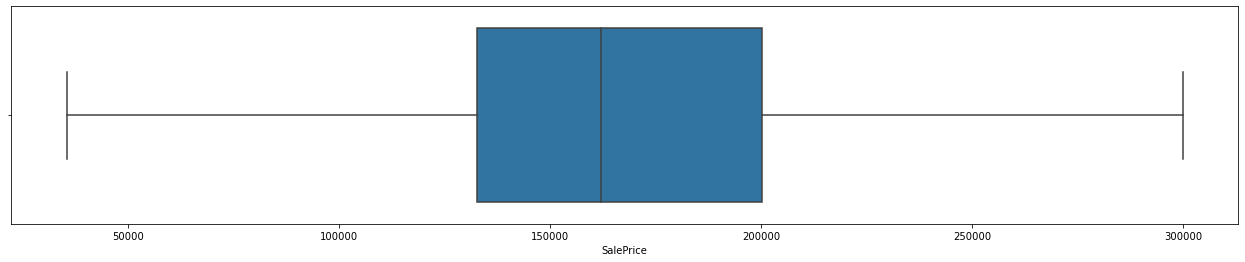

In [1226]:
#Outliers still persisted, so a new df was created to make sure they were all removed 

more_than_60_missing_removed=more_than_60_missing_removed.query('SalePrice < 300000.0')
sns.boxplot(x=more_than_60_missing_removed['SalePrice'])
plt.show()

7500.0
11311.5
1782.75
17028.75
3811.5


C:\Users\jadal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

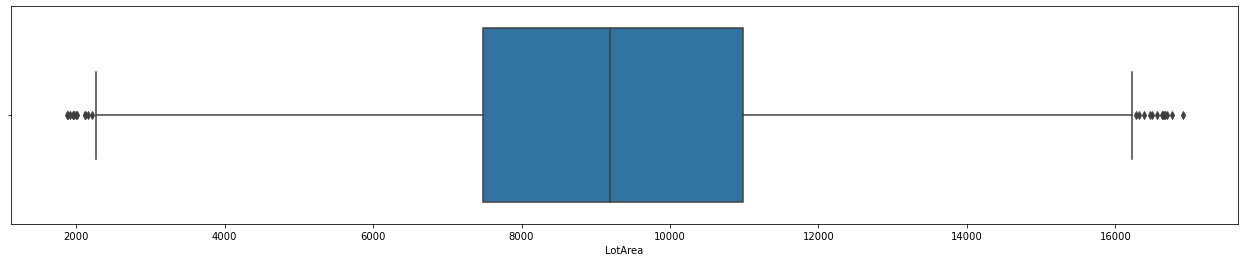

In [1227]:
#find outliers for lot area

print(more_than_60_missing_removed.LotArea.quantile(0.25))
print(more_than_60_missing_removed.LotArea.quantile(0.75))

lot_Q1 = more_than_60_missing_removed.LotArea.quantile(0.25)
lot_Q3 = more_than_60_missing_removed.LotArea.quantile(0.75)
lot_IQR = lot_Q3- lot_Q1

lot_lower_lim = lot_Q1 - 1.5 * lot_IQR
lot_upper_lim = lot_Q3 + 1.5 * lot_IQR

print(lot_lower_lim)
print(lot_upper_lim)

print(lot_IQR)

low_outliers_lot = (more_than_60_missing_removed['LotArea'] < lot_lower_lim)
up_outliers_lot = (more_than_60_missing_removed['LotArea'] > lot_upper_lim)
len(more_than_60_missing_removed['LotArea']) - (len(more_than_60_missing_removed['LotArea'][low_outliers_lot]) + 
                                                      len(more_than_60_missing_removed['LotArea'][up_outliers_lot]))

more_than_60_missing_removed = more_than_60_missing_removed[~(low_outliers_lot|up_outliers_lot)]

sns.boxplot(more_than_60_missing_removed['LotArea'])


7500.0
347500.0
85000.0


C:\Users\jadal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


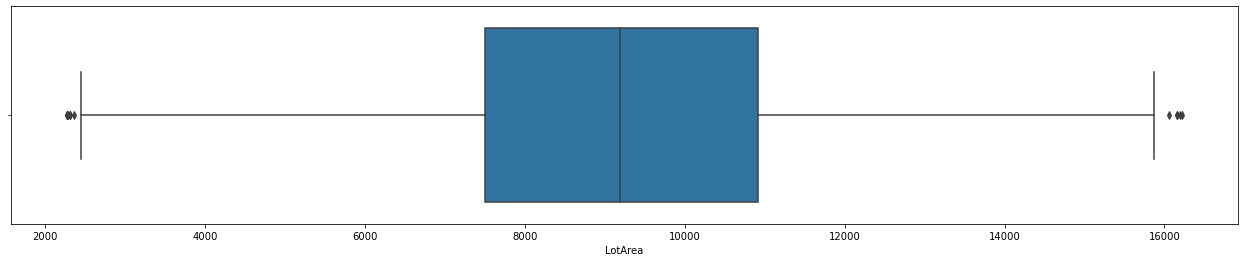

In [1228]:
#Setup IQRs for outlier removal 


Q1_lot_2 = more_than_60_missing_removed.LotArea.quantile(0.25)
Q3_lot_2 = more_than_60_missing_removed.LotArea.quantile(0.75)
IQR_lot_2 = Q3_lot_2- Q1_lot_2

lower_lim_lot_2 = Q1_lot_2 - 1.5 * IQR_lot_2
upper_lim_lot_2 = Q3_lot_2 + 1.5 * IQR_lot_2

print(lower_lim)
print(upper_lim)

print(IQR)

up_outliers_lot = (more_than_60_missing_removed['LotArea'] > upper_lim_lot_2)
low_outliers_lot = (more_than_60_missing_removed['LotArea'] < lower_lim_lot_2)

len(more_than_60_missing_removed['LotArea']) - (len(more_than_60_missing_removed['LotArea'][low_outliers_saleprice]) + 
                                                      len(more_than_60_missing_removed['LotArea'][up_outliers_lot]))

test_lot = more_than_60_missing_removed[~(low_outliers_lot|up_outliers_lot)]

more_than_60_missing_removed=more_than_60_missing_removed.query('LotArea < 16000.0')
sns.boxplot(test_lot['LotArea'])
plt.show()

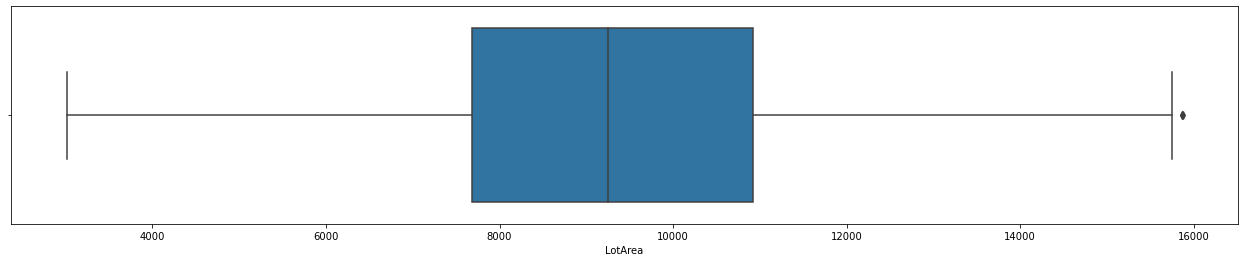

In [1229]:
#Below is another code that should help further remove outliers from lot area 
more_than_60_missing_removed=more_than_60_missing_removed.query('LotArea > 3000.0')
sns.boxplot(x=more_than_60_missing_removed['LotArea'])
plt.show()

In [1230]:
#Check the df 
more_than_60_missing_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1103 non-null   int64  
 1   MSSubClass     1103 non-null   int64  
 2   MSZoning       1103 non-null   object 
 3   LotFrontage    1103 non-null   float64
 4   LotArea        1103 non-null   int64  
 5   Street         1103 non-null   object 
 6   LotShape       1103 non-null   object 
 7   LandContour    1103 non-null   object 
 8   Utilities      1103 non-null   object 
 9   LotConfig      1103 non-null   object 
 10  LandSlope      1103 non-null   object 
 11  Neighborhood   1103 non-null   object 
 12  Condition1     1103 non-null   object 
 13  Condition2     1103 non-null   object 
 14  BldgType       1103 non-null   object 
 15  HouseStyle     1103 non-null   object 
 16  OverallQual    1103 non-null   int64  
 17  OverallCond    1103 non-null   int64  
 18  YearBuil

In [1231]:
#Check the number of duplicate rows. None of the rows were dupicates
more_than_60_missing_removed.duplicated().sum()

0

In [1232]:
#One Hot encoding

df_no_missing_value = more_than_60_missing_removed.copy()
house_price_v2 = pd.get_dummies(df_no_missing_value, columns=['MSZoning', 'Street', 'LotShape', 'LandContour',
                                                             'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 
                                                              'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                                              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                                                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                                              'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
                                                              'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 
                                                              'SaleCondition', 'RoofStyle'], prefix=['MSZoning', 'Street', 'LotShape', 'LandContour',
                                                             'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 
                                                              'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                                              'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                                              'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 
                                                              'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                              'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                                              'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
                                                              'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 
                                                              'SaleCondition', 'RoofStyle'])



In [1233]:
df_no_missing_value

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL    65.000000     8450   Pave      Reg   
1        2          20       RL    80.000000     9600   Pave      Reg   
2        3          60       RL    68.000000    11250   Pave      IR1   
3        4          70       RL    60.000000     9550   Pave      IR1   
4        5          60       RL    84.000000    14260   Pave      IR1   
5        6          50       RL    85.000000    14115   Pave      IR1   
7        8          60       RL    70.049958    10382   Pave      IR1   
8        9          50       RM    51.000000     6120   Pave      Reg   
9       10         190       RL    50.000000     7420   Pave      Reg   
10      11          20       RL    70.000000    11200   Pave      Reg   
12      13          20       RL    70.049958    12968   Pave      IR2   
13      14          20       RL    91.000000    10652   Pave      IR1   
14      15          20       RL    70.049958    10920   Pave      IR1   
15      16          45       RM    51.000000     6120   Pave      Reg   
16      17          20       RL    70.049958    11241   Pave      IR1   
18      19          20       RL    66.000000    13695   Pave      Reg   
19      20          20       RL    70.000000     7560   Pave      Reg   
21      22          45       RM    57.000000     7449   Pave      Reg   
22      23          20       RL    75.000000     9742   Pave      Reg   
23      24         120       RM    44.000000     4224   Pave      Reg   
24      25          20       RL    70.049958     8246   Pave      IR1   
25      26          20       RL   110.000000    14230   Pave      Reg   
26      27          20       RL    60.000000     7200   Pave      Reg   
29      30          30       RM    60.000000     6324   Pave      IR1   
30      31          70  C (all)    50.000000     8500   Pave      Reg   
31      32          20       RL    70.049958     8544   Pave      IR1   
32      33          20       RL    85.000000    11049   Pave      Reg   
33      34          20       RL    70.000000    10552   Pave      IR1   
34      35         120       RL    60.000000     7313   Pave      Reg   
36      37          20       RL   112.000000    10859   Pave      Reg   
37      38          20       RL    74.000000     8532   Pave      Reg   
38      39          20       RL    68.000000     7922   Pave      Reg   
40      41          20       RL    84.000000     8658   Pave      Reg   
42      43          85       RL    70.049958     9180   Pave      IR1   
43      44          20       RL    70.049958     9200   Pave      IR1   
44      45          20       RL    70.000000     7945   Pave      Reg   
46      47          50       RL    48.000000    12822   Pave      IR1   
47      48          20       FV    84.000000    11096   Pave      Reg   
49      50          20       RL    66.000000     7742   Pave      Reg   
50      51          60       RL    70.049958    13869   Pave      IR2   
51      52          50       RM    52.000000     6240   Pave      Reg   
52      53          90       RM   110.000000     8472   Grvl      IR2   
54      55          80       RL    60.000000     7134   Pave      Reg   
55      56          20       RL   100.000000    10175   Pave      IR1   
57      58          60       RL    89.000000    11645   Pave      IR1   
59      60          20       RL    60.000000     7200   Pave      Reg   
60      61          20       RL    63.000000    13072   Pave      Reg   
61      62          75       RM    60.000000     7200   Pave      Reg   
62      63         120       RL    44.000000     6442   Pave      IR1   
63      64          70       RM    50.000000    10300   Pave      IR1   
64      65          60       RL    70.049958     9375   Pave      Reg   
67      68          20       RL    72.000000    10665   Pave      IR1   
68      69          30       RM    47.000000     4608   Pave      Reg   
69      70          50       RL    81.000000    15593   Pave      

In [1234]:
#Normalize and scale dataset

from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()
#names = house_price_v2.columns
#d = scaler.fit_transform(house_price_v2)
#scaled_df = pd.DataFrame(d, columns=names)
#scaled_df.head()

In [1235]:
# Using Sklearn & MinMax Scalar.
from sklearn import preprocessing

x = house_price_v2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_df= pd.DataFrame(x_scaled)

normalized_df.head()

0         1         2         3         4         5         6    \
0  0.000000  0.235294  0.230263  0.423017  0.714286  0.428571  0.953488   
1  0.000685  0.000000  0.328947  0.512442  0.571429  0.857143  0.744186   
2  0.001371  0.235294  0.250000  0.640747  0.714286  0.428571  0.937984   
3  0.002056  0.294118  0.197368  0.508554  0.714286  0.428571  0.271318   
4  0.002742  0.235294  0.355263  0.874806  0.857143  0.428571  0.930233   

        7        8         9    10        11        12        13        14   \
0  0.883333  0.12250  0.375532  0.0  0.073457  0.310459  0.169919  0.530106   
1  0.433333  0.00000  0.520213  0.0  0.139079  0.478297  0.334959  0.000000   
2  0.866667  0.10125  0.258511  0.0  0.212537  0.336916  0.195935  0.537554   
3  0.333333  0.00000  0.114894  0.0  0.264447  0.269119  0.212602  0.469274   
4  0.833333  0.21875  0.348404  0.0  0.239961  0.429930  0.287398  0.653631   

   15        16   17   18        19   20        21   22        23        24   \
0  0.0  0.481089  0.5  0.0  0.666667  0.5  0.500000  0.0  0.555556  0.000000   
1  0.0  0.311649  0.0  0.5  0.666667  0.0  0.500000  0.0  0.333333  0.333333   
2  0.0  0.509834  0.5  0.0  0.666667  0.5  0.500000  0.0  0.333333  0.333333   
3  0.0  0.483737  0.5  0.0  0.333333  0.0  0.500000  0.0  0.444444  0.333333   
4  0.0  0.665658  0.5  0.0  0.666667  0.5  0.666667  0.0  0.666667  0.333333   

        25        26        27        28        29        30   31   32   33   \
0  0.936364  0.333333  0.315447  0.000000  0.111517  0.000000  0.0  0.0  0.0   
1  0.690909  0.333333  0.243902  0.404891  0.000000  0.000000  0.0  0.0  0.0   
2  0.918182  0.333333  0.364228  0.000000  0.076782  0.000000  0.0  0.0  0.0   
3  0.890909  0.666667  0.391870  0.000000  0.063985  0.704663  0.0  0.0  0.0   
4  0.909091  0.666667  0.549593  0.260870  0.153565  0.000000  0.0  0.0  0.0   

   34        35    36        37   38   39   40   41   42   43   44   45   46   \
0  0.0  0.090909  0.50  0.654806  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1  0.0  0.363636  0.25  0.552722  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  0.727273  0.50  0.711519  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   
3  0.0  0.090909  0.00  0.395816  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   
4  0.0  1.000000  0.50  0.811712  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0   

   47   48   49   50   51   52   53   54   55   56   57   58   59   60   61   \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   

   62   63   64   65   66   67   68   69   70   71   72   73   74   75   76   \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   

   77   78   79   80   81   82   83   84   85   86   87   88   89   90   91   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

   92   93   94   95   96   97   98   99   100  101  102  103  104  105  106  \
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  1.

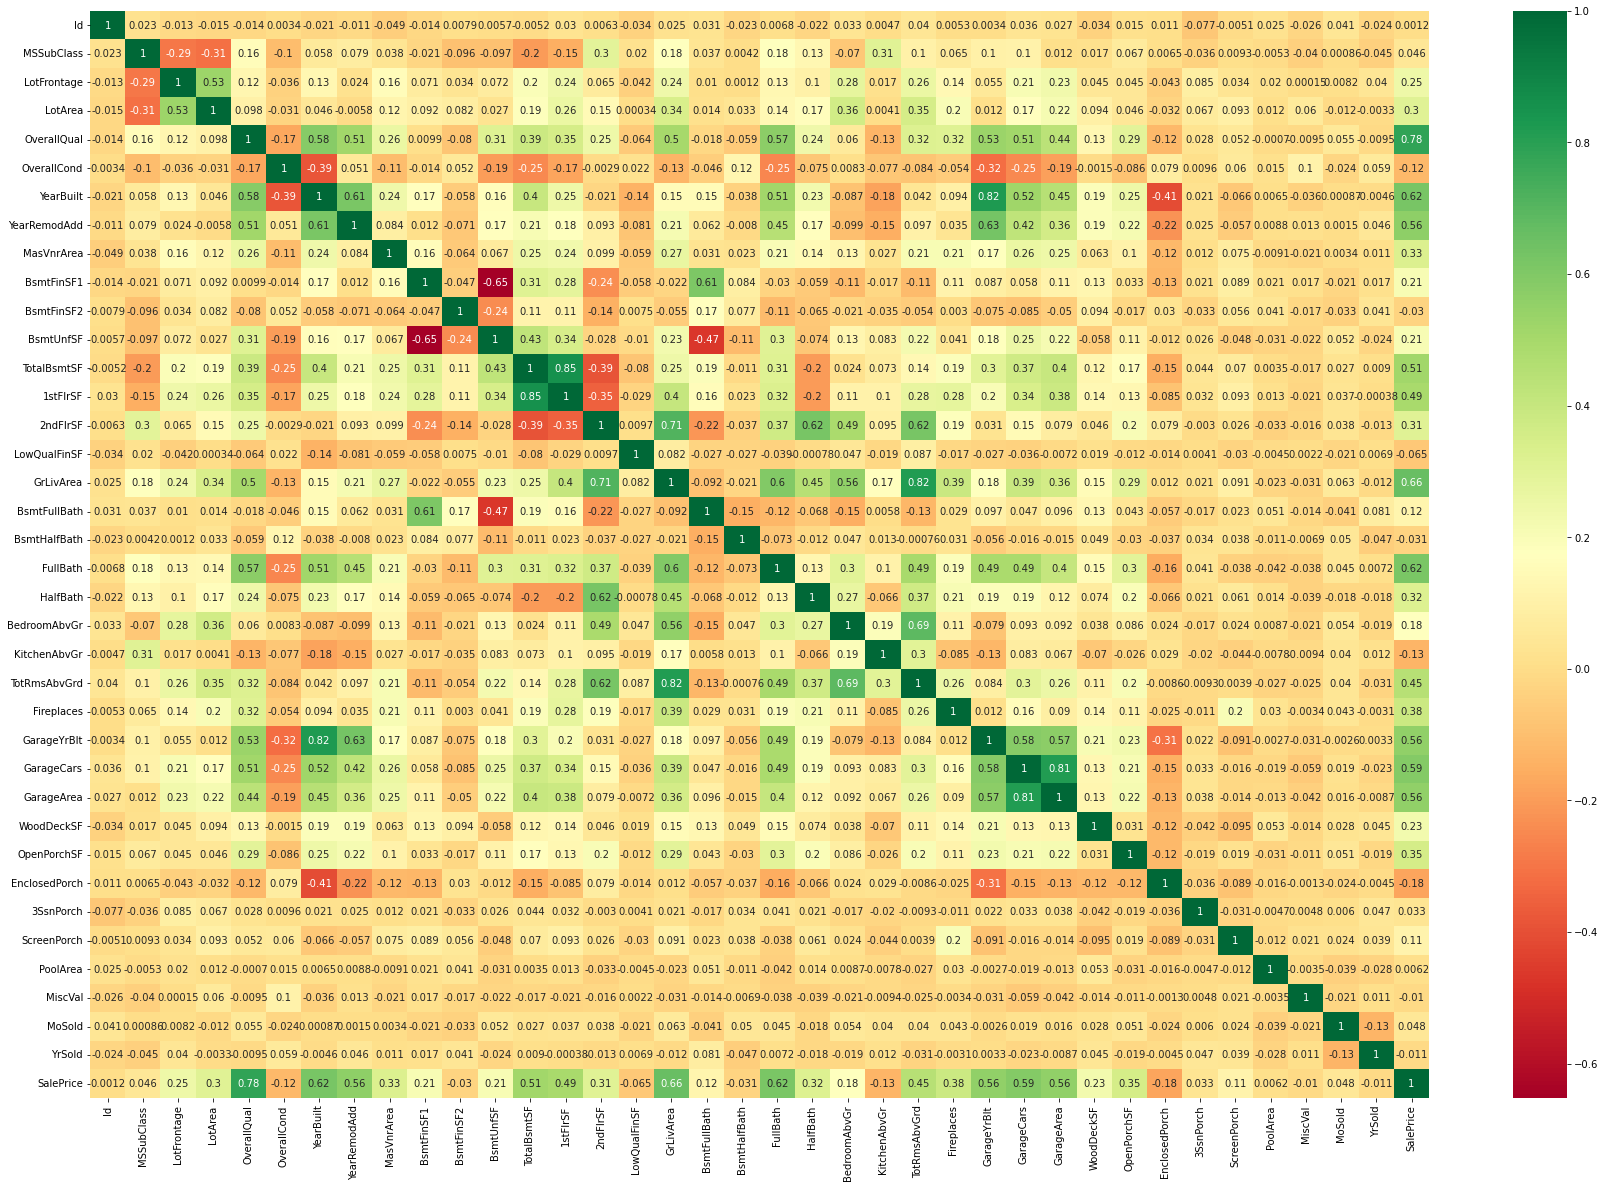

In [1236]:
#Use a heat map to figure out which features are correlated

plt.figure(figsize=(30, 20))
sns.heatmap(more_than_60_missing_removed.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [1237]:
#Remove correlated features 

house_price_cols_dropped = more_than_60_missing_removed.drop(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath'
                                             ,'GarageYrBlt', 'GarageCars','GarageArea', 'LotFrontage', 'MSSubClass'
                                             , 'TotalBsmtSF', 'LotArea' ,'YearRemodAdd', 'HalfBath', 'TotRmsAbvGrd',
                                             'Fireplaces', 'OpenPorchSF', 'SalePrice', 'TotRmsAbvGrd', 'BedroomAbvGr',
                                                             'MasVnrArea'], axis=1)

house_price_cols_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1103 non-null   int64 
 1   MSZoning       1103 non-null   object
 2   Street         1103 non-null   object
 3   LotShape       1103 non-null   object
 4   LandContour    1103 non-null   object
 5   Utilities      1103 non-null   object
 6   LotConfig      1103 non-null   object
 7   LandSlope      1103 non-null   object
 8   Neighborhood   1103 non-null   object
 9   Condition1     1103 non-null   object
 10  Condition2     1103 non-null   object
 11  BldgType       1103 non-null   object
 12  HouseStyle     1103 non-null   object
 13  OverallQual    1103 non-null   int64 
 14  OverallCond    1103 non-null   int64 
 15  YearBuilt      1103 non-null   int64 
 16  RoofStyle      1103 non-null   object
 17  RoofMatl       1103 non-null   object
 18  Exterior1st    1103 non-null